In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from ipywidgets import interact

In [2]:
data = pd.read_csv(r"C:\Users\DELL\Desktop\python projects\data.csv")

In [3]:

data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.columns.unique()

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [5]:
data.shape

(2200, 8)

In [6]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
data['label'].value_counts()

mango          100
kidneybeans    100
papaya         100
orange         100
banana         100
coffee         100
cotton         100
pigeonpeas     100
rice           100
grapes         100
pomegranate    100
muskmelon      100
lentil         100
blackgram      100
apple          100
maize          100
mothbeans      100
watermelon     100
mungbean       100
chickpea       100
coconut        100
jute           100
Name: label, dtype: int64

In [8]:
# Lets check the summary of each crop
print("Average Ratio of Nitrogen in soil : {0:2f}".format(data["N"].mean()))
print("Average Ratio of Phospherous in soil : {0:2f}".format(data["P"].mean()))
print("Average Ratio of Potassium in soil : {0:2f}".format(data["K"].mean()))
print("Average Temperature : {0:2f}".format(data["temperature"].mean()))
print("Average Relative Humidity : {0:2f}".format(data["humidity"].mean()))
print("Average PH value : {0:2f}".format(data["ph"].mean()))
print("Average Rainfall: {0:2f}".format(data["rainfall"].mean()))

Average Ratio of Nitrogen in soil : 50.551818
Average Ratio of Phospherous in soil : 53.362727
Average Ratio of Potassium in soil : 48.149091
Average Temperature : 25.616244
Average Relative Humidity : 71.481779
Average PH value : 6.469480
Average Rainfall: 103.463655


In [9]:
# Lets check the summary statistic of each crop 
@interact
def summary(crops=list(data['label'].value_counts().index)):
    x=data[data['label'] == crops]
    print("---------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum:",x['N'].min())
    print("Average:",x['N'].mean())
    print("Maximum:",x['N'].max())
    print("---------------------------------------")
    print("Statistics for Phospherous")
    print("Minimum:",x['P'].min())
    print("Average:",x['P'].mean())
    print("Maximum:",x['P'].max())
    print("---------------------------------------")
    print("Statistics for Potassium")
    print("Minimum:",x['K'].min())
    print("Average:",x['K'].mean())
    print("Maximum:",x['K'].max())
    print("---------------------------------------")
    print("Statistics for Temperature")
    print("Minimum:",x['temperature'].min())
    print("Average:",x['temperature'].mean())
    print("Maximum:",x['temperature'].max())
    print("---------------------------------------")
    print("Statistics for Humidity")
    print("Minimum:",x['humidity'].min())
    print("Average:",x['humidity'].mean())
    print("Maximum:",x['humidity'].max())
    print("---------------------------------------")
    print("Statistics for ph")
    print("Minimum:",x['ph'].min())
    print("Average:",x['ph'].mean())
    print("Maximum:",x['ph'].max())
    print("---------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum:",x['rainfall'].min())
    print("Average:",x['rainfall'].mean())
    print("Maximum:",x['rainfall'].max())






interactive(children=(Dropdown(description='crops', options=('mango', 'kidneybeans', 'papaya', 'orange', 'bana…

In [10]:
# For average conditions
@interact
def compare(conditions=['N','P','K','temperature','ph','humidity','rainfall']):
    print("Crops which require greater than average : " ,conditions,'\n')
    print(data[data[conditions]>data[conditions].mean()]['label'].unique())
    print("--"*50)
    print("Crops which require less or equal to  average : ", conditions,'\n')
    print(data[data[conditions]<=data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

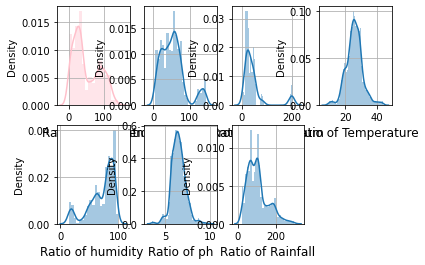

In [11]:


plt.subplot(2,4,1)
sb.distplot(data['N'],color='pink')
plt.xlabel("Ratio of Nitrogen",fontsize=12)
plt.grid()

plt.subplot(2,4,2)
sb.distplot(data['P'])
plt.xlabel("Ratio of Phospherous",fontsize=12)
plt.grid()

plt.subplot(2,4,3)
sb.distplot(data['K'])
plt.xlabel("Ratio of Potassium",fontsize=12)
plt.grid()

plt.subplot(2,4,4)
sb.distplot(data['temperature'])
plt.xlabel("Ratio of Temperature",fontsize=12)
plt.grid()

plt.subplot(2,4,5)
sb.distplot(data['humidity'])
plt.xlabel("Ratio of humidity ",fontsize=12)
plt.grid()

plt.subplot(2,4,6)
sb.distplot(data['ph'])
plt.xlabel("Ratio of ph",fontsize=12)
plt.grid()

plt.subplot(2,4,7)
sb.distplot(data['rainfall'])
plt.xlabel("Ratio of Rainfall",fontsize=12)
plt.grid()

plt.show()

In [12]:
# Leyts understand which crop can only be grown in summer,winter & rainy season

print("Summer Crops")
print(data[(data['temperature']>30 )&(data['humidity']>50)]['label'].unique())
print("--"*30)
print("Winter Crops")
print(data[(data['temperature']<20 )&(data['humidity']>30)]['label'].unique())
print("--"*30)
print("Rainy Crops")
print(data[(data['rainfall']>200 )&(data['humidity']>50)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
------------------------------------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
------------------------------------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']
